#**LAB Assignment - 7**

---



##**LOESS Smoothing**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
data = pd.read_csv('/content/RELI Historical Data.csv')

In [3]:
# Convert 'Date' to datetime and 'Price' to numeric (after removing commas)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''))

In [4]:
# Sort by Date in ascending order and filter the last 60 days
data_sorted = data.sort_values('Date', ascending=True)
last_60_days = data_sorted.tail(60)

##**Plot the stock prices for the last 60 days as a scatter plot.**

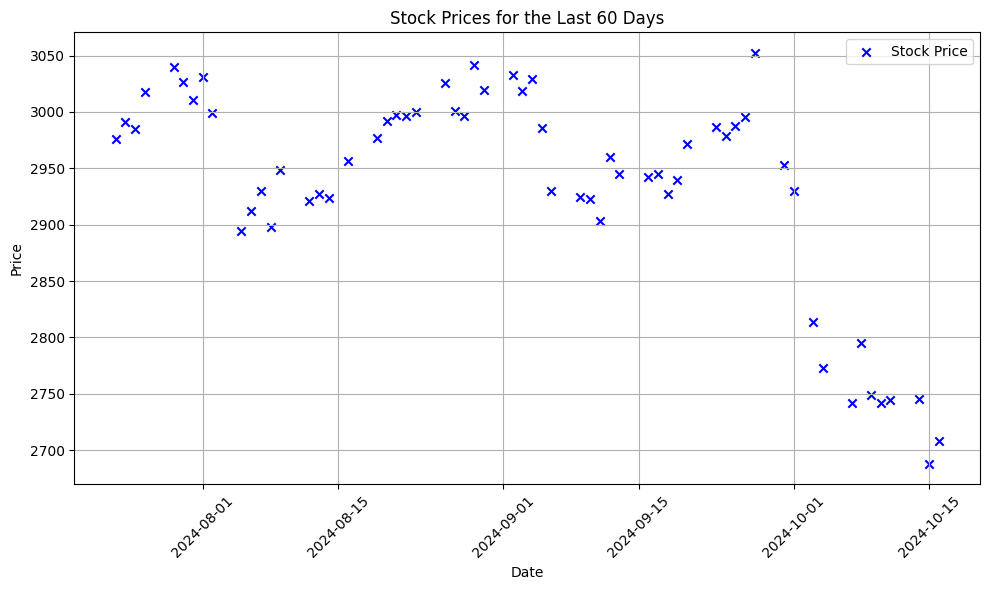

In [6]:
# Plot the stock prices for the last 60 days as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(last_60_days['Date'], last_60_days['Price'], color='blue', marker='x', label='Stock Price')
plt.title('Stock Prices for the Last 60 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid lines
plt.legend()
plt.tight_layout()
plt.show()

##**Apply LOESS smoothing using 6 different span/bandwidth values: 0.15, 0.30, 0.45, 0.60, 0.75, and 0.90.**

In [5]:
# Define the span/bandwidth values to test
spans = [0.15, 0.30, 0.45, 0.60, 0.75, 0.90]

##**Separate plot that compares the smoothed data with the original stock price data.**

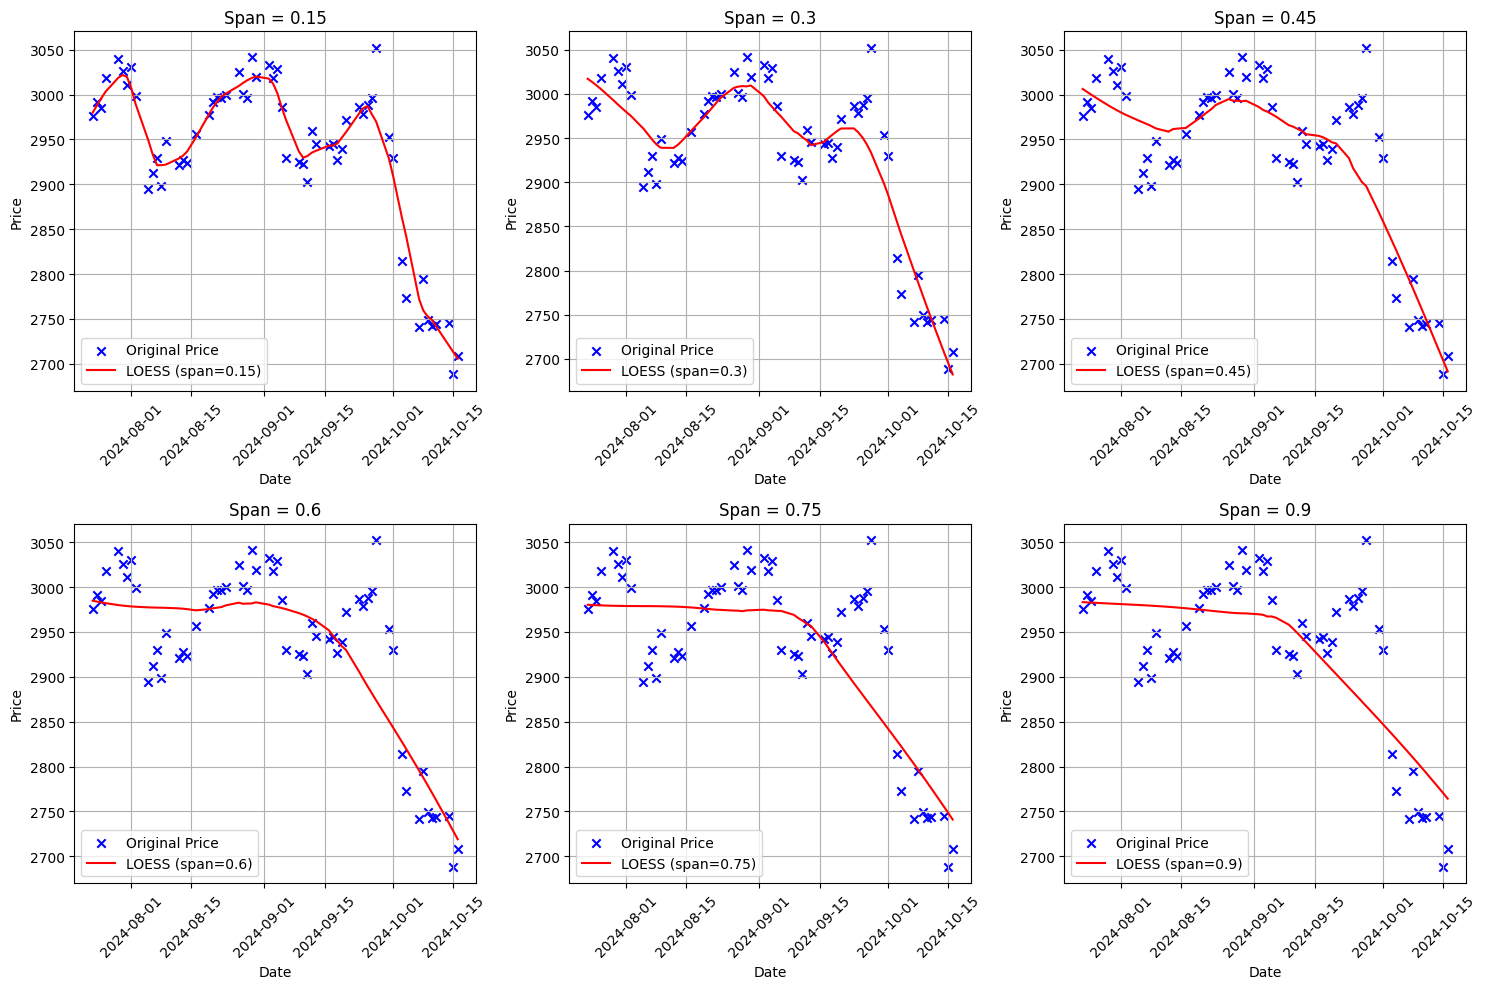

In [15]:
# Apply LOESS smoothing for each span and plot the results
plt.figure(figsize=(15, 10))

for i, span in enumerate(spans):
    # Apply LOESS smoothing
    smoothed = lowess(last_60_days['Price'], last_60_days['Date'], frac=span, return_sorted=False)

    # Create subplot for each span
    plt.subplot(2, 3, i + 1)
    plt.scatter(last_60_days['Date'], last_60_days['Price'], color='blue', marker='x', label='Original Price')
    plt.plot(last_60_days['Date'], smoothed, color='red', label=f'LOESS (span={span})')
    plt.title(f'Span = {span}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Based on the plots, let's assume an optimal span of 0.45 for further comparison
optimal_span = 0.45

In [17]:
# Apply LOESS smoothing with linear (degree=1) and quadratic (degree=2) polynomial fits
smoothed_linear = lowess(last_60_days['Price'], last_60_days['Date'], frac=optimal_span, it=0, return_sorted=False)
smoothed_quadratic = lowess(last_60_days['Price'], last_60_days['Date'], frac=optimal_span, it=1, return_sorted=False)

##**The most optimal span value that balances between overfitting and underfitting.**

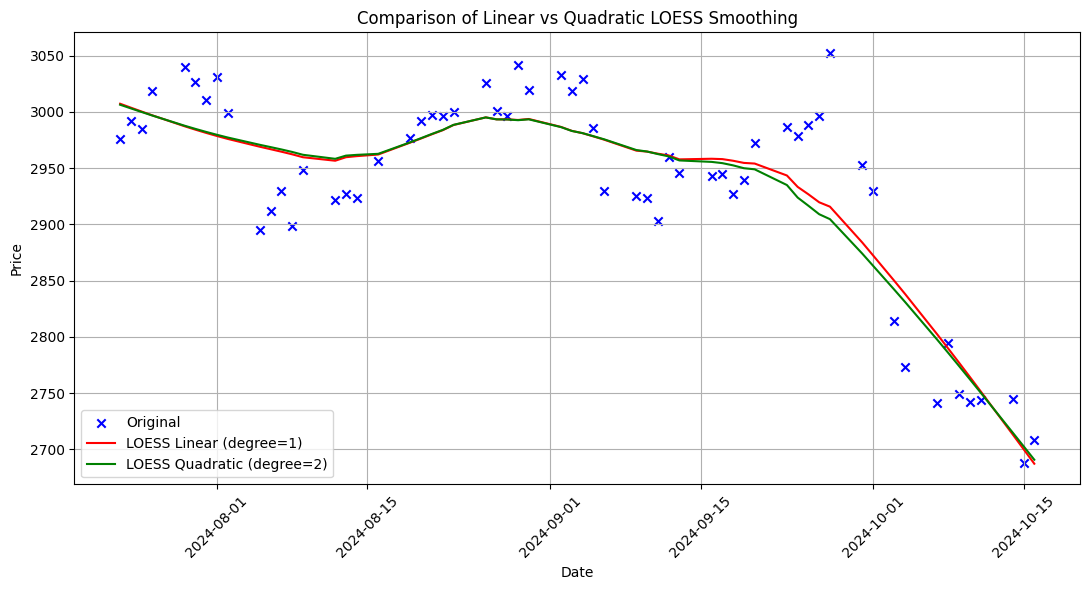

In [21]:
# Plot the comparison of linear vs quadratic smoothing
plt.figure(figsize=(11, 6))
plt.scatter(last_60_days['Date'], last_60_days['Price'], color='blue', marker='x', label='Original')  # Use cross symbol
plt.plot(last_60_days['Date'], smoothed_linear, color='red', label='LOESS Linear (degree=1)')
plt.plot(last_60_days['Date'], smoothed_quadratic, color='green', label='LOESS Quadratic (degree=2)')
plt.title('Comparison of Linear vs Quadratic LOESS Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid lines
plt.legend()
plt.tight_layout()
plt.show()

##**Conclusion:- The optimal span value is 0.45, and linear LOESS (degree 1) provides a smoother and more interpretable fit for the stock price data, balancing simplicity and accuracy. Quadratic LOESS could be used if the data shows more complex behavior but may risk unnecessary complexity.**